In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Webtoon dataset using pandas

In [9]:
df = pd.read_csv('./Webtoon Dataset.csv').head(20)
df


,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...
5,5,LUMINE,Emma Krogell,18.9M,Fantasy,9.82,3M,"A runaway werewolf, Lumine, meets a witch boy ...",UP EVERY SUNDAY,https://www.webtoons.com/en/fantasy/lumine/lis...
6,6,Jackson's Diary,Paola Batalla,2.9M,Supernatural,9.66,649K,"The year is 1989, and Jackson is starting his ...",UP EVERY SUNDAY,https://www.webtoons.com/en/supernatural/jacks...
7,7,Teenage Mercenary,YC / Rakyeon,"9,29,796",Action,9.87,537.6K,"At the age of eight, Ijin Yu lost his parents ...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/action/teenage-mer...
8,8,Nice To Meet You,Wishroomness,5.8M,Romance,9.82,1.1M,A ditsy university student Mew finds a lost st...,UP EVERY MONDAY,https://www.webtoons.com/en/romance/nice-to-me...
9,9,I Love Yoo,Quimchee,29M,Drama,9.78,4.3M,Dogged by pain and misfortune from the very be...,UP EVERY FRIDAY,https://www.webtoons.com/en/drama/i-love-yoo/l...


### the counts of each Webtoon with a certain genre 

<AxesSubplot:xlabel='Genre', ylabel='count'>

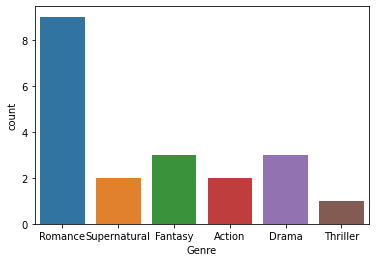

In [11]:
sns.countplot(x="Genre", data=df)

### Now, we want to plot the likes vs the subscribers and see how they are related

In [22]:
likes_subscribers=df[['Name','Likes','Subscribers']].head(10)
likes_subscribers

,Name,Likes,Subscribers
0,Let's Play,30.6M,4.2M
1,True Beauty,39.9M,6.4M
2,Midnight Poppy Land,10.4M,2.1M
3,Age Matters,25.9M,3.5M
4,Unholy Blood,9.9M,1.5M
5,LUMINE,18.9M,3M
6,Jackson's Diary,2.9M,649K
7,Teenage Mercenary,"9,29,796",537.6K
8,Nice To Meet You,5.8M,1.1M
9,I Love Yoo,29M,4.3M


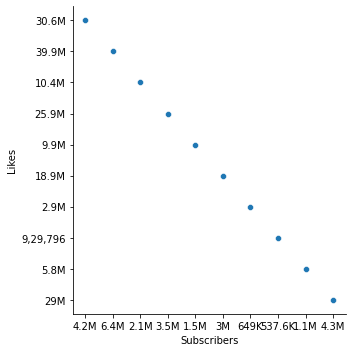

In [31]:
plot_legend = 'likes_subscribers'
plot=sns.relplot(x='Subscribers', y='Likes', data=likes_subscribers)
plot


 we notice that the likes and the subscribers have a linear relation, the more subscribers a series has, the more likes it gets . Now, if we want the sum of the likes for each Genre:

In [33]:
total_likes = df.groupby('Genre', as_index=False).Likes.sum()
total_likes

,Genre,Likes
0,Action,"9,29,7969.9M"
1,Drama,29M10.2M1.5M
2,Fantasy,"18.9M8.3M2,17,959"
3,Romance,"30.6M39.9M10.4M25.9M5.8M9.3M10.8M7,90,3133.8M"
4,Supernatural,9.9M2.9M
5,Thriller,1.7M
